В задаче необходимо научиться определять, утонет ли посетитель Титаника или нет по наличию (не всегда хорошо заполненных) признаков.

train.csv — набор данных на основании которого будет строиться модель (обучающая выборка)<br>
test.csv — набор данных для проверки модели

Для каждого пассажира известны следующие признаки

PassengerId — идентификатор пассажира<br>
Survival — поле в котором указано спасся человек (1) или нет (0)<br>
Pclass — содержит социально-экономический статус (высокий, средний, низкий)<br>
Name — имя пассажира<br>
Sex — пол пассажира<br>
Age — возраст<br>
SibSp — содержит информацию о количестве родственников 2-го порядка (муж, жена, братья, сетры)<br>
Parch — содержит информацию о количестве родственников на борту 1-го порядка (мать, отец, дети)<br>
Ticket — номер билета<br>
Fare — цена билета<br>
Cabin — каюта<br>
Embarked — порт посадки (C — Cherbourg, Q — Queenstown, S — Southampton)<br>

Для начала с помощью Pandas посмотрим на данные

In [58]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [59]:
train.head(13)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [61]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Можно предположить, что чем выше социальный статус, тем больше вероятность спасения. Давайте посмотрим, действительно ли это так. Для этого построим сводную. 

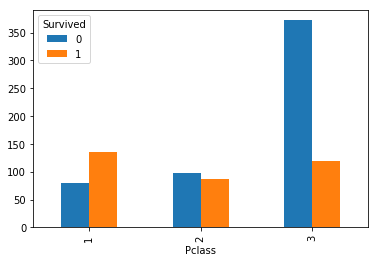

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt

train.pivot_table('PassengerId', 'Pclass', 'Survived', 'count').plot(kind='bar')

Теперь посмотрим, как влияет кол-во родственников на целевую переменную. Для этого построим также сводные:

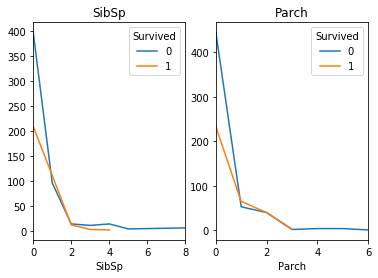

In [63]:
fig, axes = plt.subplots(ncols=2)
train.pivot_table('PassengerId', ['SibSp'], 'Survived', 'count').plot(ax=axes[0], title='SibSp')
train.pivot_table('PassengerId', ['Parch'], 'Survived', 'count').plot(ax=axes[1], title='Parch')

Посмотрим теперь, все ли хорошо с данными, есть ли в них пропуски. Очень полезно для этого использовать info() и describe()

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [65]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [66]:
train.groupby('Sex').median()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,414.5,1.0,2.0,27.0,0.0,0.0,23.0
male,464.0,0.0,3.0,29.0,0.0,0.0,10.5


In [80]:
train.Age = train.Age.fillna(28)

In [121]:
import pickle

In [122]:
pickle.dump(rfc, open('rfc.pckl', 'w'), protocol=-1)

In [127]:
!ls -alh rfc.pckl

-rw-r--r--  1 ermakovpetr  staff   248M Apr 18 20:30 rfc.pckl


In [137]:
df = pd.DataFrame([('1', ['a', 2, 'b', 3]), ('1', ['a', -1, 'b', -3])])

In [138]:
df.fla

,0,1
0,1,"[a, 2, b, 3]"
1,1,"[a, -1, b, -3]"


In [134]:
df['a'] = df[1].map(lambda x: x.get('a'))

In [135]:
df

,0,1,a
0,1,"{u'a': 2, u'b': 3}",2
1,1,"{u'a': -1, u'b': -3}",-1


In [ ]:
df = 

In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Видим, что номера кают заполнены очень плохо, возраст можно попытаться как-то восстановить: есть 2 варианта - заполнить медианным значением или же натренировать классификатор по другим признакам. Поступим простым путем - заполним медианным значением

In [82]:
MaxPassEmbarked = train.groupby('Embarked').count()['PassengerId']
train.Embarked[train.Embarked.isnull()] = MaxPassEmbarked[MaxPassEmbarked == MaxPassEmbarked.max()].index[0]

/Users/ermakovpetr/_projects/npl_venv/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Остался еще порт посадки - там всего 2 значения не заполнены. Давайте присвоим эти пассажирам порт в котором село больше всего людей:

Теперь посмотрим на оставшиеся данные. Важно понимать, что ненужные признаки нужно отбрасывать - т.к. они добавляют шум. <br>
У нас остались: Имя (из него можно попробовать вытащить пол - упражнение на дом), Номер билета (тут ради интереса можно проверить на какую-нибудь четность, например), Номер каюты (тоже в нумерологию не верим)    

In [83]:
train = train.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

Теперь посмотрим на то, что осталось

Что делать с категориальными переменным? Их нужно закодировать - в sklearn для этого уже есть LabelEncoder

In [84]:
#from sklearn.preprocessing import LabelEncoder
#label = LabelEncoder()
#dicts = {}

## кодируем пол 
#label.fit(train.Sex.drop_duplicates()) #задаем список значений для кодирования
#dicts['Sex'] = list(label.classes_)
#train.Sex = label.transform(train.Sex) #заменяем значения из списка кодами закодированных элементов 

## кодируем порт посадки
#label.fit(train.Embarked.drop_duplicates())
#dicts['Embarked'] = list(label.classes_)
#train.Embarked = label.transform(train.Embarked)

train = pd.get_dummies(train, ['Sex', 'Embarked'])

In [85]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


Теперь, тоже самое нам нужно сделать с test.csv - удалить те же столбцы и сделать те же преобразования. На практике лучше сразу писать для этого отдельную функцию

In [86]:
test.Age[test.Age.isnull()] = test.Age.mean()
test.Fare[test.Fare.isnull()] = test.Fare.median() #заполняем пустые значения средней ценой билета


/Users/ermakovpetr/_projects/npl_venv/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/ermakovpetr/_projects/npl_venv/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [87]:
test = test.drop(['Name','Ticket','Cabin','PassengerId'],axis=1)

test = pd.get_dummies(test, ['Sex', 'Embarked'])

In [91]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass        418 non-null int64
Age           418 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          418 non-null float64
Sex_female    418 non-null uint8
Sex_male      418 non-null uint8
Embarked_C    418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
dtypes: float64(2), int64(3), uint8(5)
memory usage: 18.4 KB


In [179]:
X_train, X_test, y_train, y_test = train_test_split(train_features, train_target)

In [180]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test)

In [168]:
lr = RandomForestClassifier(n_estimators=10000)

In [169]:
lr.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [170]:
X_test['predict'] = lr.predict_proba(X_test)[:,1]

/Users/ermakovpetr/_projects/npl_venv/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [171]:
X_val['predict'] = lr.predict_proba(X_val)[:,1]

/Users/ermakovpetr/_projects/npl_venv/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [172]:
%%time
rfc = RandomForestClassifier(n_estimators=10000)
rfc.fit(X_test, y_test)
predict = rfc.predict_proba(X_val)

CPU times: user 33.1 s, sys: 163 ms, total: 33.3 s
Wall time: 33.3 s


In [173]:
from sklearn.metrics import roc_curve, auc

In [174]:
fpr, tpr, thresholds = roc_curve(y_test, predict[:, 1])

In [175]:
pd.DataFrame(zip(rfc.feature_importances_, X_test.columns))

,0,1
0,0.027387,Pclass
1,0.032196,Age
2,0.010546,SibSp
3,0.008598,Parch
4,0.043970,Fare
5,0.090660,Sex_female
6,0.088377,Sex_male
7,0.003997,Embarked_C
8,0.002334,Embarked_Q
9,0.004519,Embarked_S


In [176]:
%%time
rfc = RandomForestClassifier(n_estimators=10000)
rfc.fit(X_train.drop(['predict'], axis=1), y_train)
predict2 = rfc.predict_proba(X_test.drop(['predict'], axis=1))

CPU times: user 33.3 s, sys: 152 ms, total: 33.5 s
Wall time: 33.4 s


In [177]:
fpr2, tpr2, thresholds2 = roc_curve(y_test, predict2[:, 1])

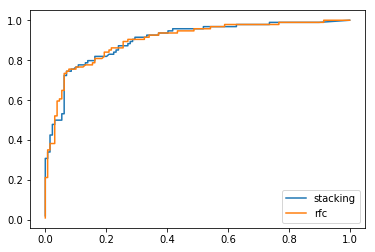

In [178]:
plt.plot(fpr, tpr, label='stacking')
plt.plot(fpr2, tpr2, label='rfc')
plt.legend()

In [92]:
from sklearn.model_selection import  train_test_split

In [93]:
from sklearn import cross_validation

In [94]:
train_target = train.Survived
train_features = train.drop(['Survived'], axis=1) #из исходных данных убираем Id пассажира и флаг спасся он или нет

In [95]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Pclass        891 non-null int64
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Sex_female    891 non-null uint8
Sex_male      891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int64(3), uint8(5)
memory usage: 39.2 KB


CPU times: user 104 µs, sys: 28 µs, total: 132 µs
Wall time: 130 µs


In [111]:
%%time
rfc.fit(train_features, train_target)

CPU times: user 27.9 s, sys: 250 ms, total: 28.2 s
Wall time: 28.1 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [112]:
tmp = pd.DataFrame(zip(rfc.feature_importances_, train_features.columns))

In [113]:
tmp.sort(0, ascending=False)

/Users/ermakovpetr/_projects/npl_venv/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


,0,1
4,0.257647,Fare
1,0.252616,Age
6,0.143958,Sex_male
5,0.140903,Sex_female
0,0.085722,Pclass
2,0.049098,SibSp
3,0.036893,Parch
9,0.013515,Embarked_S
7,0.012306,Embarked_C
8,0.007342,Embarked_Q


Все, 80% работы мы сделали: теперь мы имеем матрицу обьект-признак, которую можно "скармливать" на вход различным алгоритмам машинного обучения<br>
Будем пробовать SVM, KNeighbors, RandomForest, log-regression

In [114]:
from sklearn import cross_validation, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import pylab as pl

Для удобства (тут кому как нравится, если в голове все держите - можно не делать) выделим отдельно целевую переменную.

In [115]:



kfold = 5 #количество подвыборок для валидации
itog_val = {} #список для записи результатов кросс валидации разных алгоритмов

In [117]:
model_rfc = RandomForestClassifier(n_estimators = 70) #в параметре передаем кол-во деревьев
model_knc = KNeighborsClassifier(n_neighbors = 18) #в параметре передаем кол-во соседей
model_lr = LogisticRegression(penalty='l1', tol=0.01) 
model_svc = svm.SVC(probability=True) #по умолчанию kernek='rbf'

Делаем скользящий контроль

In [118]:
scores = cross_validation.cross_val_score(model_rfc, train_features, train_target, cv = kfold)
itog_val['RandomForestClassifier'] = scores.mean()
scores = cross_validation.cross_val_score(model_knc, train_features, train_target, cv = kfold)
itog_val['KNeighborsClassifier'] = scores.mean()
scores = cross_validation.cross_val_score(model_lr, train_features, train_target, cv = kfold)
itog_val['LogisticRegression'] = scores.mean()
scores = cross_validation.cross_val_score(model_svc, train_features, train_target, cv = kfold)
itog_val['SVC'] = scores.mean()

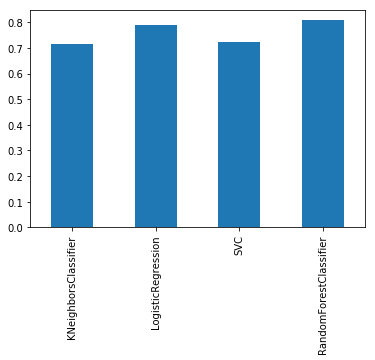

In [119]:
pd.DataFrame.from_dict(data = itog_val, orient='index').plot(kind='bar', legend=False)

Для построения ROC-кривых нам надо руками (с помощью функции train_test_split модуля cross_validation) делить на обучающую и проверочную выборки<br>
На выходе получим:<br>
новый обучающий массив признаков<br>
проверочный массив признаков<br>
новый массив целевой переменной<br>
проверочный массив целевой переменной

In [215]:
ROCtrainTRN, ROCtestTRN, ROCtrainTRG, ROCtestTRG = cross_validation.train_test_split(train_features, train_target, test_size=0.25) 

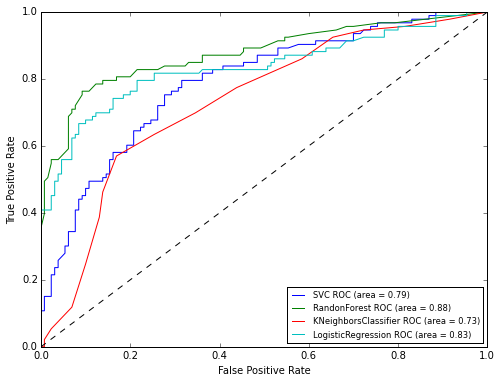

In [217]:
pl.clf()
plt.figure(figsize=(8,6))
#SVC
model_svc.probability = True
probas = model_svc.fit(ROCtrainTRN, ROCtrainTRG).predict_proba(ROCtestTRN)
fpr, tpr, thresholds = roc_curve(ROCtestTRG, probas[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('SVC', roc_auc))
#RandomForestClassifier
probas = model_rfc.fit(ROCtrainTRN, ROCtrainTRG).predict_proba(ROCtestTRN)
fpr, tpr, thresholds = roc_curve(ROCtestTRG, probas[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('RandonForest',roc_auc))
#KNeighborsClassifier
probas = model_knc.fit(ROCtrainTRN, ROCtrainTRG).predict_proba(ROCtestTRN)
fpr, tpr, thresholds = roc_curve(ROCtestTRG, probas[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('KNeighborsClassifier',roc_auc))
#LogisticRegression
probas = model_lr.fit(ROCtrainTRN, ROCtrainTRG).predict_proba(ROCtestTRN)
fpr, tpr, thresholds = roc_curve(ROCtestTRG, probas[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('LogisticRegression',roc_auc))
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.legend(loc=0, fontsize='small')
pl.show()

Чем выше лежит ROC-кривая - тем лучше - видим, что тут тоже RandomForest работает очень хорошо - оставляем его в качестве классификатора

Все, осталось вызвать predict для каждого обьекта из тестовой выборки и засабмитить результат

In [218]:
model_rfc.fit(train_features, train_target)
result.insert(1,'Survived', model_rfc.predict(test))
result.to_csv('ans.csv', index=False)

Обучим заново логистическую регрессию на всех фичах

In [223]:
model_lr.fit(train_features, train_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l1', random_state=None, tol=0.01)

Посмотрим какие фичи какой вклад вносят в модель логистической регрессии

In [228]:
import numpy
for idx in numpy.argsort(model_lr.coef_)[0][:10]: # последние 10 с минимальным коэфициентом
    print '{}, importance = {:.5f}'.format(train_features.columns[idx], model_lr.coef_[0][idx])

Pclass, importance = -0.94786
SibSp, importance = -0.30920
Parch, importance = -0.08777
Age, importance = -0.03270
Embarked_S, importance = 0.00000
Fare, importance = 0.00321
Embarked_Q, importance = 0.19364
Sex_male, importance = 0.27526
Embarked_C, importance = 0.37437
Sex_female, importance = 2.95560
